# Import Package

In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sqlalchemy import create_engine, text as sql_text

# Establish Connection

In [2]:
# Connection details
host_p='localhost'
database_p='postgres'
user_p='postgres'
password_p='admin'
port_p = 5432

# #establishing the connection
conn = psycopg2.connect(database=database_p, user=user_p, password=password_p, host=host_p, port=port_p)
#Creating a cursor object using the cursor() method
conn.autocommit = True
cursor = conn.cursor()

connection_string = f'postgresql://{user_p}:{password_p}@{host_p}:{port_p}/{database_p}'
engine_postgresql = create_engine(connection_string)

# Exploratory Data Analysis

## All Data

See what's included in the data by printing every columns.

In [3]:
q='''
SELECT *
FROM supermarket
'''

df = pd.read_sql_query(con=engine_postgresql.connect(), sql=sql_text(q))
df

,invoice_id,branch,city,cust_type,gender,product,unit_price,quantity,tax,total,date_purchase,time_purchase,payment,cogs,gross_margin_percent,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


## Branch and City Pair

Check distinct pair of branch and city.

In [4]:
q='''
SELECT branch, city
FROM supermarket
GROUP BY city, branch
'''

df = pd.read_sql_query(con=engine_postgresql.connect(), sql=sql_text(q))
df

,branch,city
0,A,Yangon
1,B,Mandalay
2,C,Naypyitaw


Based on the result above, we know that each brand code resembles different city.

## Check Product Type

Check distinct product type from the dataset.

In [5]:
q = '''
SELECT DISTINCT product
FROM supermarket
'''

df = pd.read_sql_query(con=engine_postgresql.connect(), sql=sql_text(q))
df

,product
0,Fashion accessories
1,Electronic accessories
2,Health and beauty
3,Food and beverages
4,Sports and travel
5,Home and lifestyle


# Chapter 1: General Revenue and Sales Analysis

## General Sales Insights

In [6]:
q = '''
SELECT 
    city,
    COUNT(*) AS order_count,
    ROUND(AVG(quantity),2) AS average_qty,
    ROUND(CAST(SUM(total) AS numeric),2) AS total_revenue
FROM supermarket
GROUP BY branch, city
ORDER BY 4 DESC
'''

df = pd.read_sql_query(con=engine_postgresql.connect(), sql=sql_text(q))
df

,city,order_count,average_qty,total_revenue
0,Naypyitaw,328,5.58,110569.0
1,Yangon,340,5.47,106200.0
2,Mandalay,332,5.48,106198.0


## Sales Insight Based on Product Type

In [7]:
q = '''
SELECT 
    branch, city,
    product, unit_price,
    quantity, total
FROM supermarket
'''

df = pd.read_sql_query(con=engine_postgresql.connect(), sql=sql_text(q))
df

,branch,city,product,unit_price,quantity,total
0,A,Yangon,Health and beauty,74.69,7,548.9715
1,C,Naypyitaw,Electronic accessories,15.28,5,80.2200
2,A,Yangon,Home and lifestyle,46.33,7,340.5255
3,A,Yangon,Health and beauty,58.22,8,489.0480
4,A,Yangon,Sports and travel,86.31,7,634.3785
...,...,...,...,...,...,...
995,C,Naypyitaw,Health and beauty,40.35,1,42.3675
996,B,Mandalay,Home and lifestyle,97.38,10,1022.4900
997,A,Yangon,Food and beverages,31.84,1,33.4320
998,A,Yangon,Home and lifestyle,65.82,1,69.1110


## 1.1. Branch Performance

### Order Count by City

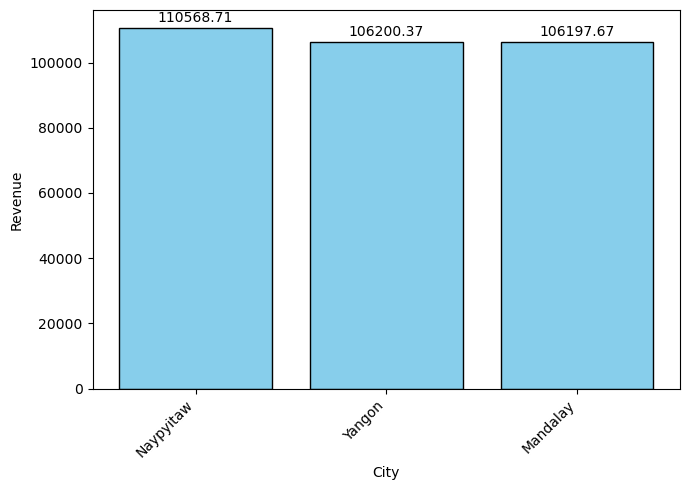

In [8]:
# Assuming df is your DataFrame with the query results
df_grouped = df.groupby('city')['total'].sum().reset_index()
df_sorted = df_grouped.sort_values('total', ascending=False)

# Plotting the map with values on top of each bar
plt.figure(figsize=(7, 5))
bars = plt.bar(df_sorted['city'], df_sorted['total'],
               color='skyblue', edgecolor='black')

# Adding values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, round(yval, 2), ha='center', va='bottom')
    
plt.xlabel('City')
plt.ylabel('Revenue')
plt.ylim()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Adjust layout for better display
plt.show()

Based on the analysis, we can conclude that the store in **Naypyitaw** generates the highest total revenue from all three branches.

### Distribution of Product Type on Each City

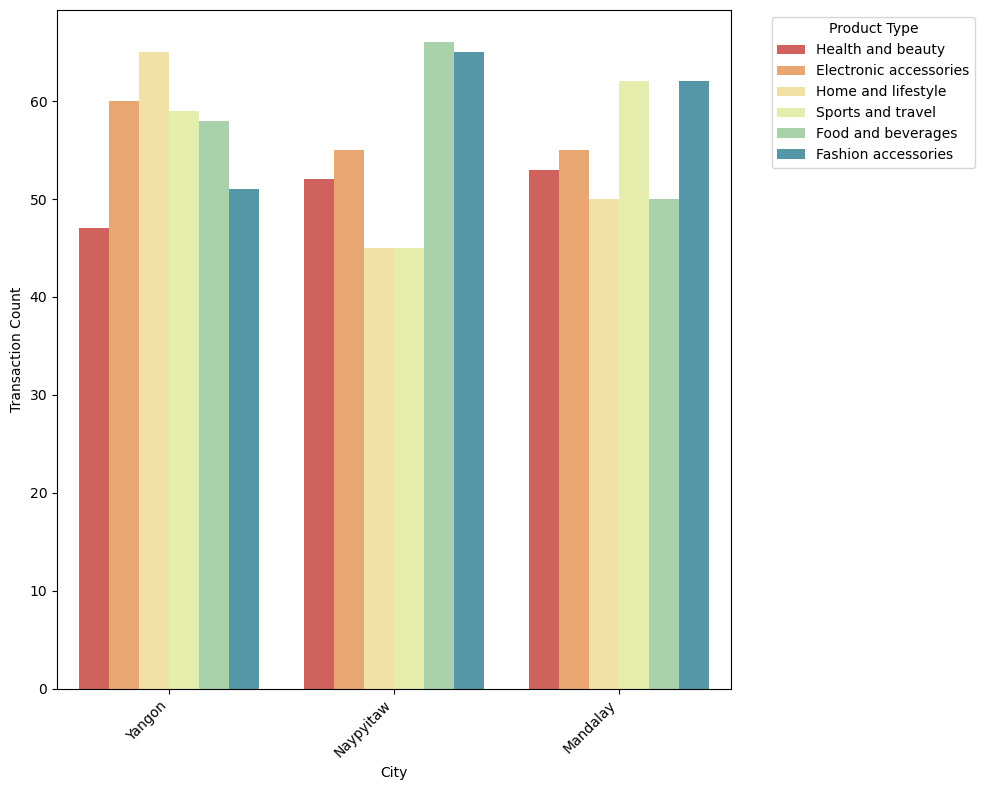

In [9]:
# Distribution of Product Types by City

plt.figure(figsize=(10, 8))

# Create a count plot using seaborn
sns.countplot(x='city', hue='product', data=df, palette='Spectral')

plt.xlabel('City')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout for better display
plt.savefig('type_city.png', dpi=150, transparent=True)
plt.show()

## 1.2. Product Performance Analysis

### Distribution of Total Revenue by Product Type

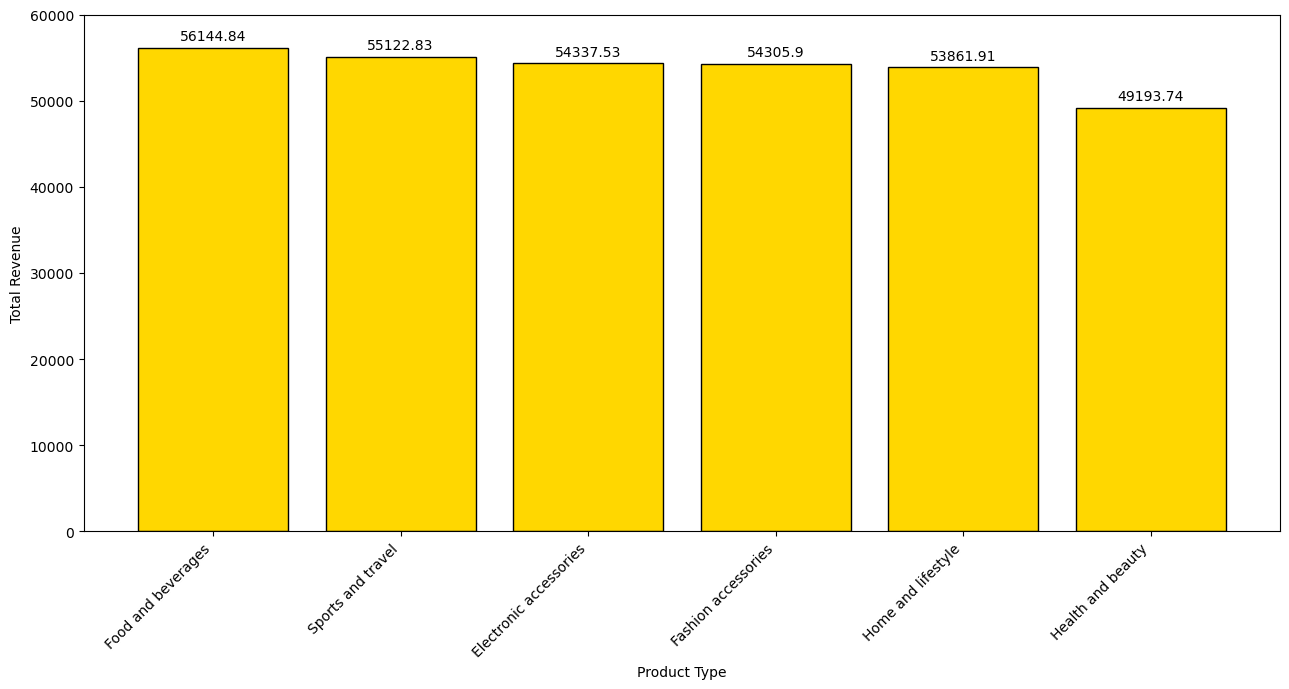

In [10]:
# Assuming df is your DataFrame with the query results
df_grouped = df.groupby('product')['total'].sum().reset_index()
df_sorted = df_grouped.sort_values('total', ascending=False)

# Plotting the map with values on top of each bar
plt.figure(figsize=(13, 7))
bars = plt.bar(df_sorted['product'], df_sorted['total'],
               color='gold', edgecolor='black')

# Adding values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, round(yval, 2), ha='center', va='bottom')
    
plt.xlabel('Product Type')
plt.ylabel('Total Revenue')
plt.ylim(0,60000)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Adjust layout for better display
plt.savefig('revenue_by_type.png', dpi=150, transparent=True)
plt.show()

### Distribution of Total Order Count by Product Type

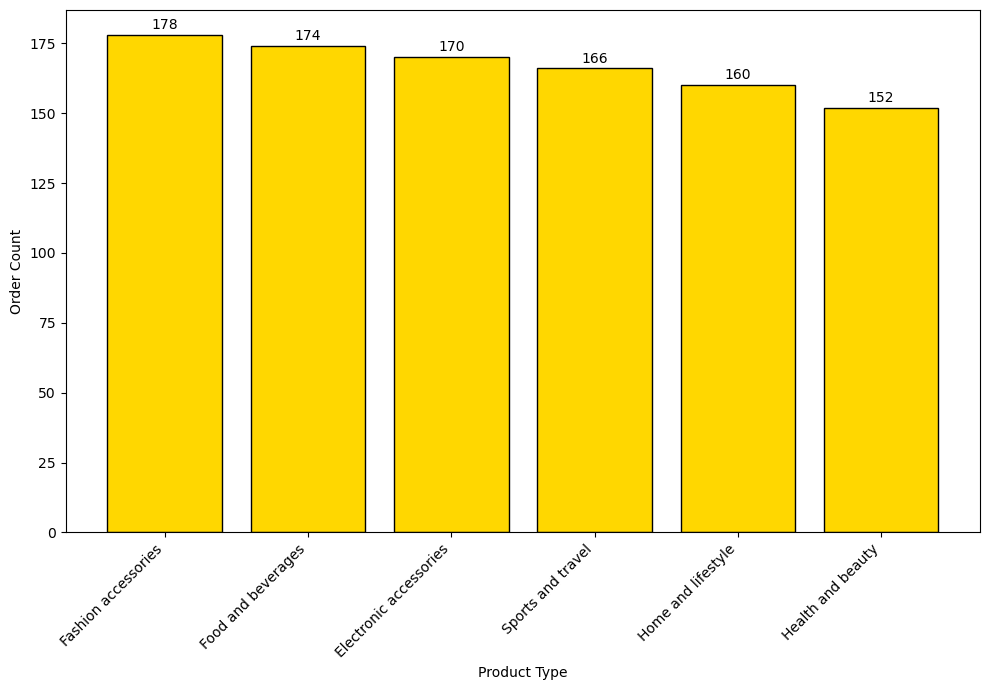

In [11]:
# Assuming df is your DataFrame with the query results
df_grouped = df.groupby('product')['total'].count().reset_index()
df_sorted = df_grouped.sort_values('total', ascending=False)

# Plotting the map with values on top of each bar
plt.figure(figsize=(10, 7))
bars = plt.bar(df_sorted['product'], df_sorted['total'],
               color='gold', edgecolor='black')

# Adding values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')
    
plt.xlabel('Product Type')
plt.ylabel('Order Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Adjust layout for better display
plt.show()

### Distribution of Average Unit Price by Product Type

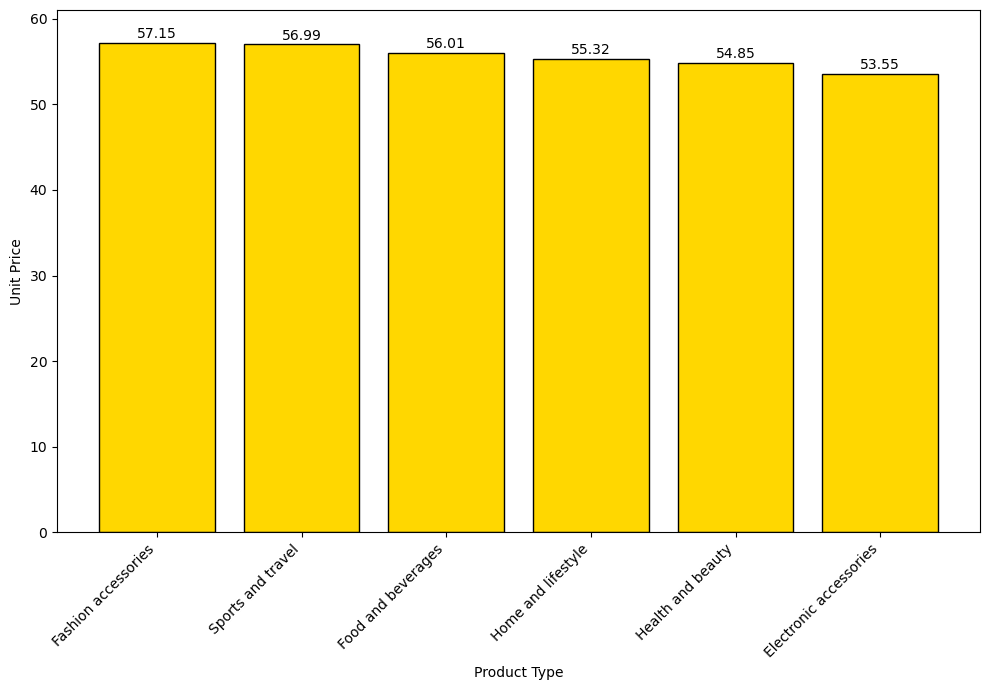

In [12]:
# Assuming df is your DataFrame with the query results
df_grouped = df.groupby('product')['unit_price'].mean().reset_index()
df_sorted = df_grouped.sort_values('unit_price', ascending=False)

# Plotting the map with values on top of each bar
plt.figure(figsize=(10, 7))
bars = plt.bar(df_sorted['product'], df_sorted['unit_price'],
               color='gold', edgecolor='black')

# Adding values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom')
    
plt.xlabel('Product Type')
plt.ylabel('Unit Price')
plt.ylim(0,61)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Adjust layout for better display
plt.show()

## 1.3. Time-Based Analysis

### Hourly Sales Trends

In [13]:
q = '''
WITH hour_trans AS (
    SELECT extract(hour FROM cast(time_purchase AS time)) AS order_hour, total
    FROM supermarket
)
SELECT 
    order_hour,
    SUM(total) AS revenue
FROM hour_trans
GROUP BY 1
ORDER BY 1
'''

df = pd.read_sql_query(con=engine_postgresql.connect(), sql=sql_text(q))
df

,order_hour,revenue
0,10.0,31421.486
1,11.0,30377.330
2,12.0,26065.883
3,13.0,34723.227
4,14.0,30828.400
5,15.0,31179.510
6,16.0,25226.322
7,17.0,24445.217
8,18.0,26030.344
9,19.0,39699.527


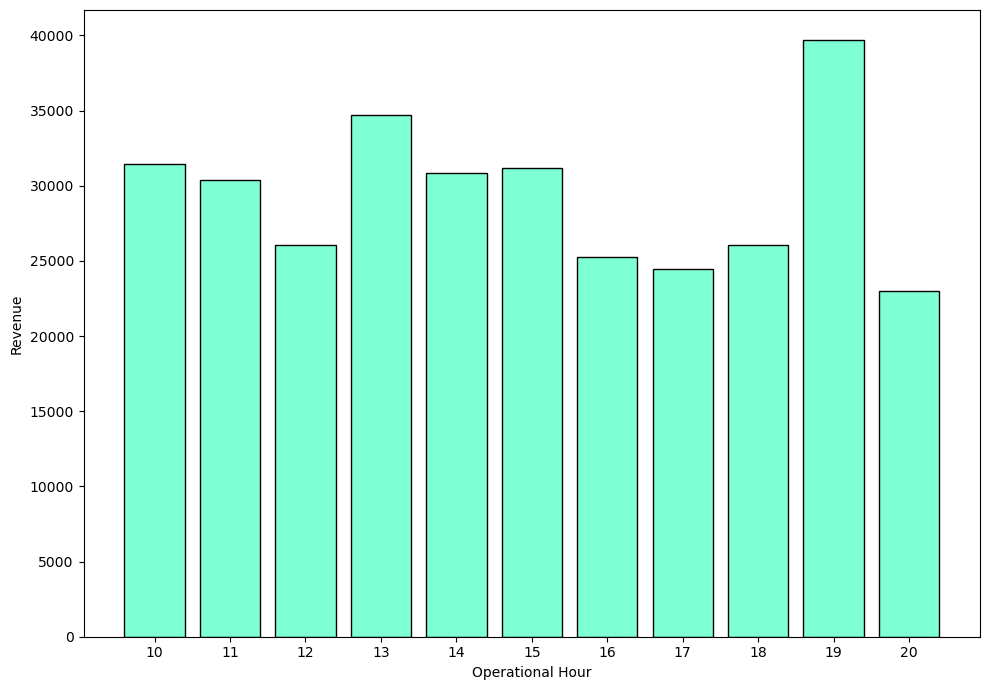

In [14]:
# Plotting the map with values on top of each bar
plt.figure(figsize=(10, 7))
bars = plt.bar(df['order_hour'], df['revenue'],
               color='aquamarine', edgecolor='black')

# Adding values on top of each bar
# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')
    
plt.xlabel('Operational Hour')
plt.ylabel('Revenue')
plt.xticks([i for i in range(10,21)])

plt.tight_layout()  # Adjust layout for better display
plt.savefig('hourly_revenue.png', dpi=150, transparent=True)
plt.show()

### Hourly Performance Products

In [15]:
q = '''
SELECT 
    extract(hour FROM cast(time_purchase AS time)) AS order_hour,
    product,
    total
FROM supermarket
'''

df = pd.read_sql_query(con=engine_postgresql.connect(), sql=sql_text(q))
df

,order_hour,product,total
0,13.0,Health and beauty,548.9715
1,10.0,Electronic accessories,80.2200
2,13.0,Home and lifestyle,340.5255
3,20.0,Health and beauty,489.0480
4,10.0,Sports and travel,634.3785
...,...,...,...
995,13.0,Health and beauty,42.3675
996,17.0,Home and lifestyle,1022.4900
997,13.0,Food and beverages,33.4320
998,15.0,Home and lifestyle,69.1110


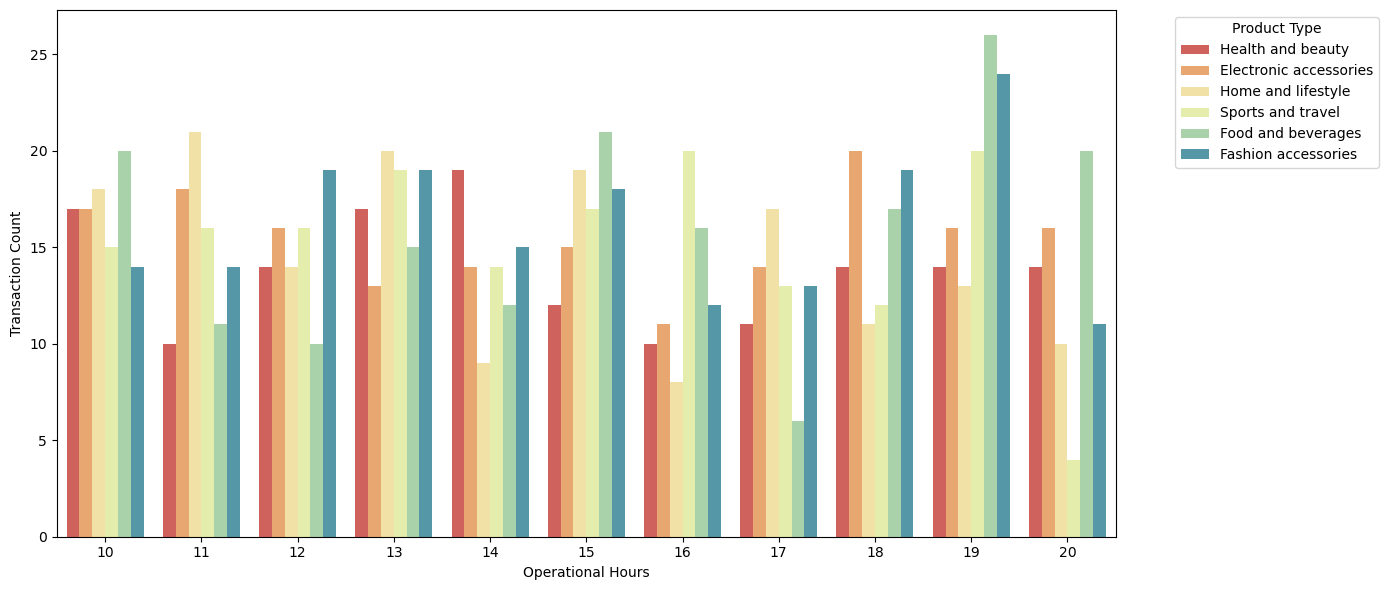

In [16]:
plt.figure(figsize=(14, 6))

# Create a count plot using seaborn
# sns.barplot(x='order_hour', y='total', hue='product', data=df, palette='Spectral', estimator=sum, errorbar=None)
sns.countplot(x='order_hour', hue='product', data=df, palette='Spectral')

plt.xlabel('Operational Hours')
plt.ylabel('Transaction Count')
plt.xticks([i for i in range(11)], [str(i) for i in range(10,21)]) 
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout for better display
plt.savefig('hourly_type.png', dpi=150, transparent=True)
plt.show()

### Sales on Each Day of the Week

In [17]:
q = '''
WITH orders AS (
    SELECT to_date(date_purchase, 'MM/DD/YYYY') AS order_date, total
    FROM supermarket s
)
SELECT 
    to_char(order_date, 'FMDay') AS day_name, 
    SUM(total) AS revenue
FROM orders
GROUP BY day_name, extract(dow FROM order_date)
ORDER BY extract(dow FROM order_date)
'''

df = pd.read_sql_query(con=engine_postgresql.connect(), sql=sql_text(q))
df

,day_name,revenue
0,Sunday,44457.900
1,Monday,37899.080
2,Tuesday,51482.240
3,Wednesday,43731.133
4,Thursday,45349.254
5,Friday,43926.332
6,Saturday,56120.820


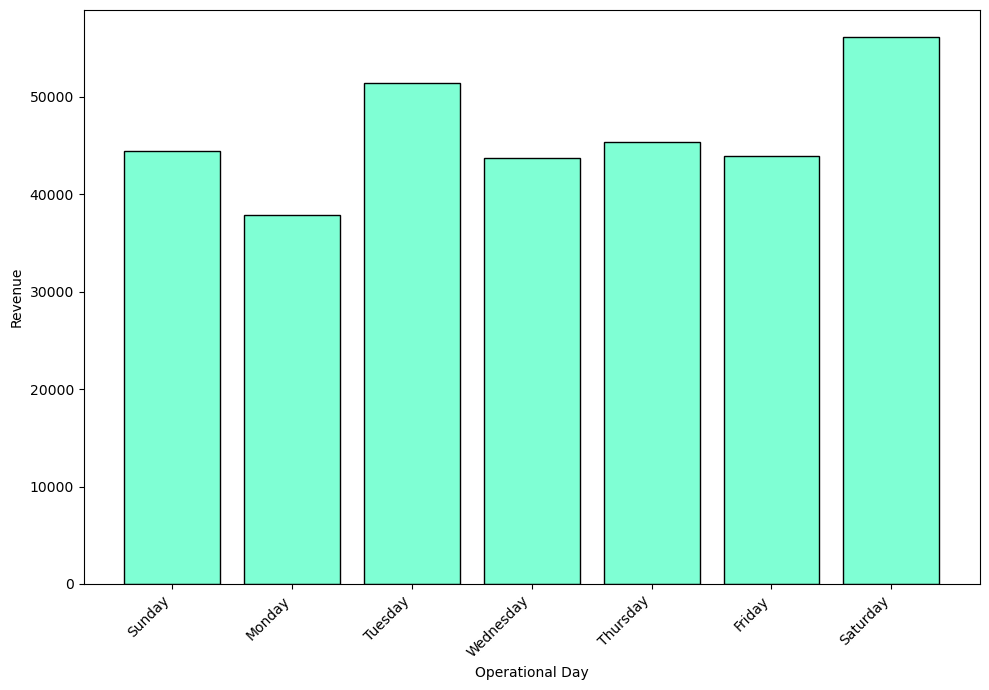

In [18]:
# Plotting the map with values on top of each bar
plt.figure(figsize=(10, 7))
bars = plt.bar(df['day_name'], df['revenue'],
               color='aquamarine', edgecolor='black')

# Adding values on top of each bar
# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), ha='center', va='bottom')
    
plt.xlabel('Operational Day')
plt.ylabel('Revenue')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Adjust layout for better display
plt.show()

# Chapter 2: Understanding the Customer Base

## 2.1. Customer Demographics

### Proportion of Customers

In [19]:
q = '''
SELECT
    SUM(CASE WHEN cust_type = 'Member' THEN 1 ELSE 0 END) AS member,
    SUM(CASE WHEN cust_type = 'Normal' THEN 1 ELSE 0 END) AS normal
FROM supermarket
'''

df = pd.read_sql_query(con=engine_postgresql.connect(), sql=sql_text(q))
df

,member,normal
0,501,499


In [20]:
q = '''
SELECT
    SUM(CASE WHEN gender = 'Female' THEN 1 ELSE 0 END) AS female,
    SUM(CASE WHEN gender = 'Male' THEN 1 ELSE 0 END) AS male
FROM supermarket
'''

df = pd.read_sql_query(con=engine_postgresql.connect(), sql=sql_text(q))
df

,female,male
0,501,499


In [21]:
q = '''
SELECT
    gender,
    SUM(CASE WHEN cust_type = 'Member' THEN 1 ELSE 0 END) AS member,
    SUM(CASE WHEN cust_type = 'Normal' THEN 1 ELSE 0 END) AS normal
FROM supermarket
GROUP BY gender
'''

df = pd.read_sql_query(con=engine_postgresql.connect(), sql=sql_text(q))
df

,gender,member,normal
0,Female,261,240
1,Male,240,259


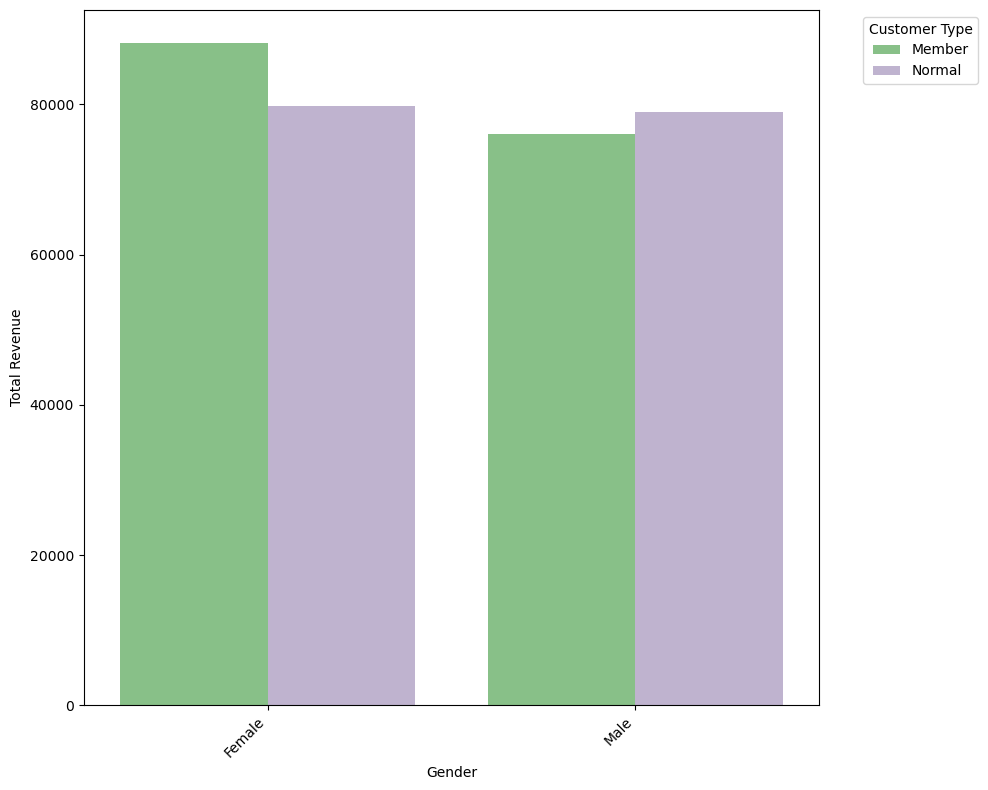

In [22]:
q = '''
SELECT
    gender,
    cust_type,
    total
FROM supermarket
'''

df = pd.read_sql_query(con=engine_postgresql.connect(), sql=sql_text(q))

# Distribution of Total Revenue by Gender and Customer Type

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 8))

# Create a count plot using seaborn
sns.barplot(x='gender', y='total', hue='cust_type', data=df,
            palette='Accent', estimator=sum, errorbar=None)

plt.xlabel('Gender')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout for better display
plt.savefig('member_revenue.png', dpi=150, transparent=True)
plt.show()

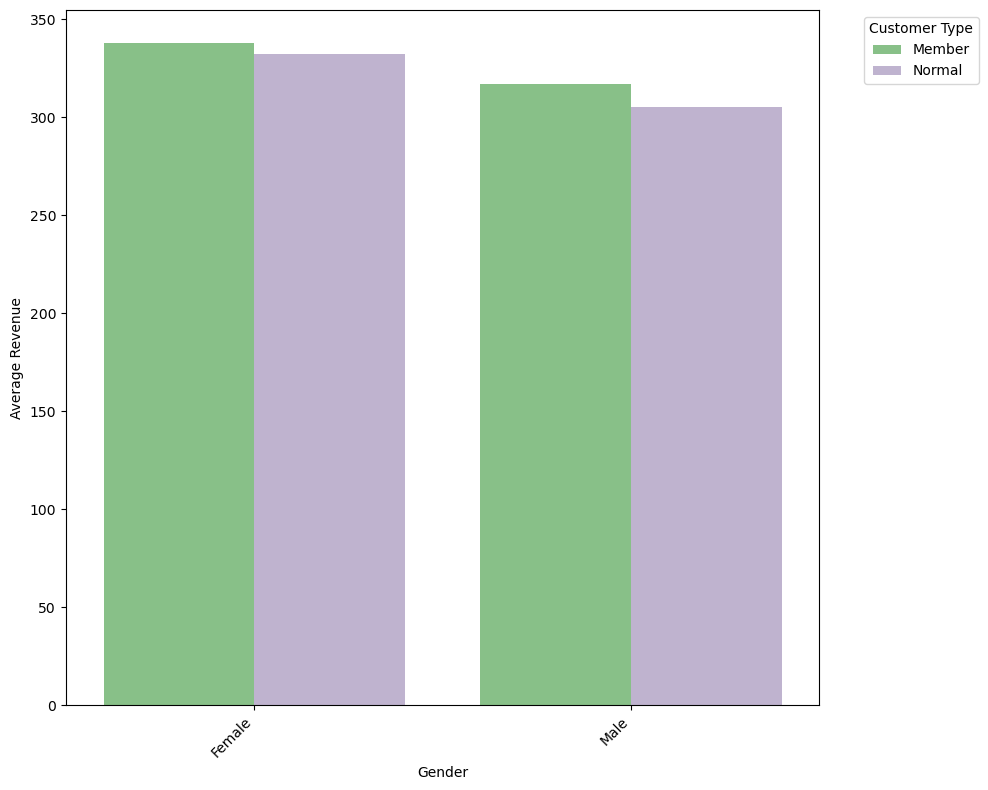

In [23]:
# Distribution of Average Revenue by Gender and Customer Type

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 8))

# Create a count plot using seaborn
sns.barplot(x='gender', y='total', hue='cust_type', data=df,
            palette='Accent', estimator=np.mean, errorbar=None)

plt.xlabel('Gender')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout for better display
plt.savefig('member_average.png', dpi=150, transparent=True)
plt.show()

### Female Members Analysis

In [24]:
q = '''
SELECT
    product, SUM(total) AS total_bill
FROM supermarket
WHERE gender = 'Female' AND cust_type = 'Member'
GROUP BY product
ORDER BY 2 DESC
'''

df = pd.read_sql_query(con=engine_postgresql.connect(), sql=sql_text(q))
df

,product,total_bill
0,Food and beverages,19598.807
1,Home and lifestyle,17234.320
2,Sports and travel,16658.220
3,Fashion accessories,15122.657
4,Electronic accessories,11153.551
5,Health and beauty,8379.388


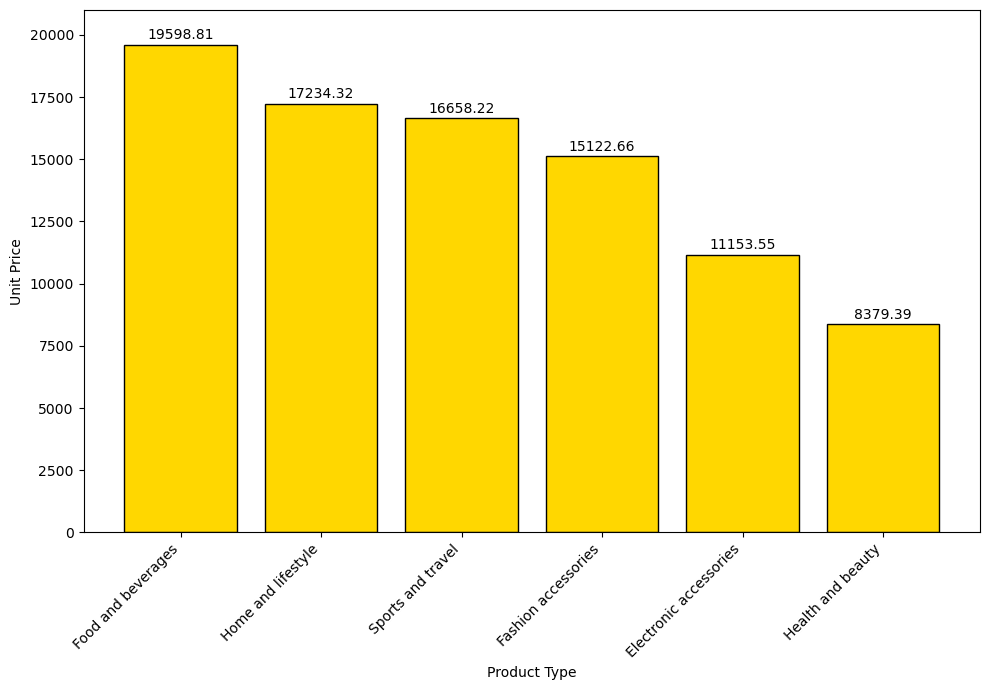

In [25]:
# Assuming df is your DataFrame with the query results
df_sorted = df.sort_values('total_bill', ascending=False)

# Plotting the map with values on top of each bar
plt.figure(figsize=(10, 7))
bars = plt.bar(df_sorted['product'], df_sorted['total_bill'],
               color='gold', edgecolor='black')

# Adding values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, round(yval, 2), ha='center', va='bottom')
    
plt.xlabel('Product Type')
plt.ylabel('Unit Price')
plt.ylim(0,21000)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Adjust layout for better display
plt.savefig('female_member_analysis.png', dpi=150, transparent=True)
plt.show()

## 2.2 Customer Satisfaction and Ratings

In [26]:
q = '''
SELECT
    gender,
    cust_type,
    MIN(rating),
    AVG(rating),
    MAX(rating)
FROM supermarket
GROUP BY gender, cust_type
'''

df = pd.read_sql_query(con=engine_postgresql.connect(), sql=sql_text(q))
df

,gender,cust_type,min,avg,max
0,Female,Member,4.0,6.940613,10.0
1,Male,Member,4.0,6.940000,9.9
2,Male,Normal,4.0,7.018919,10.0
3,Female,Normal,4.0,6.990417,10.0


In [27]:
q = '''
SELECT AVG(rating)
FROM supermarket
'''

df = pd.read_sql_query(con=engine_postgresql.connect(), sql=sql_text(q))
df

,avg
0,6.9727


## 2.3. Preferred Payment Methods

In [28]:
q = '''
SELECT 
    payment,
    COUNT(*) order_count,
    ROUND(AVG(quantity), 2) average_pcs,
    AVG(total) average_revenue,
    SUM(total) total_revenue
FROM supermarket
GROUP BY 1
ORDER BY 1
'''

df = pd.read_sql_query(con=engine_postgresql.connect(), sql=sql_text(q))
df

,payment,order_count,average_pcs,average_revenue,total_revenue
0,Cash,344,5.51,326.181889,112206.586
1,Credit card,311,5.54,324.009879,100767.050
2,Ewallet,345,5.48,318.820600,109993.130
